In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn-v0_8-whitegrid')

In [80]:
import os

LETTER_TO_VISUALIZE = 'K'

DATA_DIR = "../data/landmarks"
file_to_load = f"{LETTER_TO_VISUALIZE}.csv"
file_path = os.path.join(DATA_DIR, file_to_load)

try:
    df_landmarks = pd.read_csv(file_path, header=None)
    print(f"Arquivo '{file_to_load}' carregado com sucesso.")
    print(f"Total de poses capturadas para esta letra: {len(df_landmarks)}")
except FileNotFoundError:
    print(f"[ERRO] Arquivo '{file_path}' não encontrado. Verifique o nome da letra e se os dados foram capturados.")
    df_landmarks = None

Arquivo 'K.csv' carregado com sucesso.
Total de poses capturadas para esta letra: 1000


In [81]:
# O mapa de conexões da mão, conforme definido pelo MediaPipe
HAND_CONNECTIONS = [
    (0, 1), (1, 2), (2, 3), (3, 4),       # Polegar
    (0, 5), (5, 6), (6, 7), (7, 8),       # Indicador
    (5, 9), (9, 10), (10, 11), (11, 12),  # Médio
    (9, 13), (13, 14), (14, 15), (15, 16), # Anelar
    (13, 17), (17, 18), (18, 19), (19, 20),# Mínimo
    (0, 17)                               # Conexão da palma
]

def plot_hand_skeleton(landmark_row):
    """
    Recebe uma linha de dados (63 coordenadas) e plota o esqueleto 3D da mão.
    """
    if landmark_row is None:
        return
        
    landmarks = np.array(landmark_row).reshape(21, 3)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(landmarks[:, 0], landmarks[:, 1], landmarks[:, 2], c='red', marker='o')
    
    for connection in HAND_CONNECTIONS:
        start_idx, end_idx = connection
        start_point = landmarks[start_idx]
        end_point = landmarks[end_idx]
        ax.plot([start_point[0], end_point[0]], 
                [start_point[1], end_point[1]], 
                [start_point[2], end_point[2]], 'blue')

    ax.set_xlabel('Coordenada X')
    ax.set_ylabel('Coordenada Y')
    ax.set_zlabel('Coordenada Z')

    # --- MUDANÇA: Bloco de código para forçar a escala 1:1:1 ---
    # Encontra o centro e o raio dos dados para criar um cubo de visualização
    max_range = np.array([landmarks[:,0].max()-landmarks[:,0].min(), 
                          landmarks[:,1].max()-landmarks[:,1].min(), 
                          landmarks[:,2].max()-landmarks[:,2].min()]).max() / 2.0

    mid_x = (landmarks[:,0].max()+landmarks[:,0].min()) * 0.5
    mid_y = (landmarks[:,1].max()+landmarks[:,1].min()) * 0.5
    mid_z = (landmarks[:,2].max()+landmarks[:,2].min()) * 0.5
    
    # Define os limites de cada eixo para serem iguais
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    # --- Fim da Mudança ---

    ax.invert_yaxis() 
    ax.view_init(elev=20, azim=-120) 
    
    plt.title(f'Visualização da Pose', fontsize=16)
    plt.show()

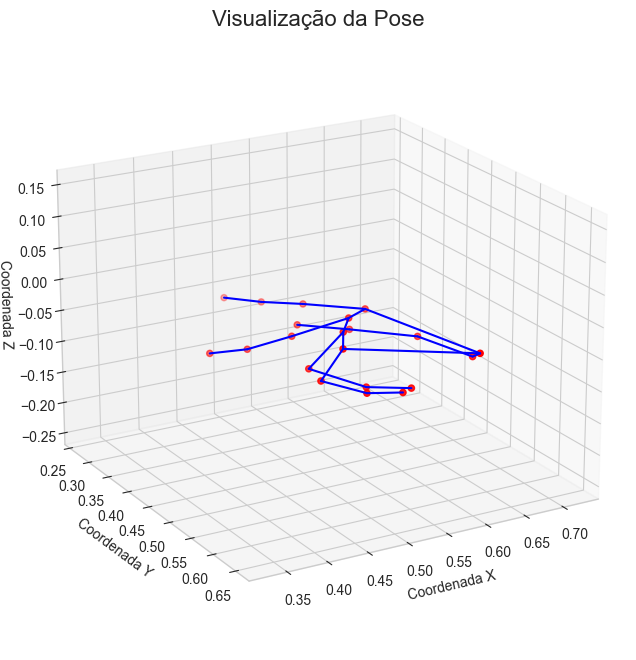

In [86]:
# --- Mude o número da pose aqui (de 0 até o total de capturas - 1) ---
POSE_NUMBER_TO_VISUALIZE = 999
# ---

if df_landmarks is not None and POSE_NUMBER_TO_VISUALIZE < len(df_landmarks):
    landmark_data_row = df_landmarks.iloc[POSE_NUMBER_TO_VISUALIZE]
    plot_hand_skeleton(landmark_data_row)
else:
    print(f"Número da pose inválido. Por favor, escolha um número entre 0 e {len(df_landmarks) - 1}.")